In [4]:
from datetime import datetime
import os
os.environ['MPLCONFIGDIR'] = "/wrk-vakka/users/hajaalin/tmp_mplconfigdir"
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

def read_output_files(dirs):
    files = []
    for d in dirs:
        files.extend(Path(d).glob('*/*.csv'))

    scores_all = []

    for f in files:
        df = pd.read_csv(f)
        df['dir'] = str(Path(f).parent)
        df['run'] = str(Path(f).parent.parent.name)
        scores_all.append(df)

    return pd.concat(scores_all)


In [5]:
output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_8_17_all_20230124',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k2_5_11_all_20230124',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k4_9_17_all_20230124',]
df = read_output_files(output_dirs)
df.head()

,accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id,dir,run
0,0.563380,0.605263,0.589744,0.597403,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,26,273020209,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_8_17_all_20230124
1,0.597222,0.574074,0.837838,0.681319,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,26,273020209,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_8_17_all_20230124
2,0.561644,0.462963,0.892857,0.609756,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,26,273020209,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_8_17_all_20230124
3,0.452055,0.764706,0.265306,0.393939,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,26,273020209,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_8_17_all_20230124
4,0.513158,0.478261,0.628571,0.543210,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_8_17,26,273020209,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_8_17_all_20230124


In [6]:
grp = df.groupby(['kernel_size','fset','epochs'])['accuracy'].agg(['mean','std'])
grp = grp.reset_index(level=2)
grp

epochs      mean       std
kernel_size fset                            
2_5_11      all        2  0.560736  0.084490
            all        4  0.583018  0.073009
            all        6  0.548017  0.078659
            all        8  0.567399  0.061290
            all       10  0.555140  0.062342
...                  ...       ...       ...
4_9_17      all       40  0.566816  0.061612
            all       42  0.564777  0.072125
            all       44  0.565584  0.055948
            all       46  0.564786  0.060771
            all       48  0.567572  0.065781

[72 rows x 3 columns]

In [ ]:

# copy data in a new dataframe, separate feature sets
ddd = pd.DataFrame()

# only k20 was tested until 300 epochs
#fsets = ['f_dxy','f_dxy_angle','f_dxy_angle_morph','f_dxy_angle_area']
fsets = ['all']
for i in range(len(fsets)):
    ddd['epochs_'+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['epochs'].values)
    ddd['mean '+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['mean'].values)
    ddd['std '+fsets[i]] = pd.Series(grp.loc[20,fsets[i]]['std'].values)
    
# check that epochs are the same for all feature sets
#test = ~((ddd['epochs_f_dxy'] == ddd['epochs_f_dxy_angle']) & (ddd['epochs_f_dxy_angle'] == ddd['epochs_f_dxy_angle_area']))
#print(ddd[test].shape)
#assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_all']
for f in fsets:
    ddd.drop(columns=['epochs_' + f], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)


#style = {'mean fset_f_x':':','std fset_f_x':':','mean fset_f_y':'--','std fset_f_y':'--','mean fset_f_morph':'-','std fset_f_morph':'-',}
#ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,50), ylim=(0.0,.7), figsize=(5,10), ax=ax[0]).legend(loc='lower right')
plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')
plot_dir.mkdir(exist_ok=True)
ts = datetime.now().strftime('%Y%m%d%H%M')
plt.savefig(plot_dir / ('accuracy_%s.png' % ts))

In [ ]:

# copy data in a new dataframe, separate kernel sets
ddd = pd.DataFrame()

ksets = ['2_5_11', '3_8_17', '4_9_17']
for i in range(len(ksets)):
    ddd['epochs_'+ksets[i]] = pd.Series(grp.loc[ksets[i],'all']['epochs'].values)
    ddd['mean '+ksets[i]] = pd.Series(grp.loc[ksets[i],'all']['mean'].values)
    ddd['std '+ksets[i]] = pd.Series(grp.loc[ksets[i],'all']['std'].values)
    
# check that epochs are the same for all feature sets
#test = ~((ddd['epochs_f_dxy'] == ddd['epochs_f_dxy_angle']) & (ddd['epochs_f_dxy_angle'] == ddd['epochs_f_dxy_angle_area']))
#print(ddd[test].shape)
#assert ddd[test].shape[0] == 0

ddd['epochs'] = ddd['epochs_2_5_11']
for k in ksets:
    ddd.drop(columns=['epochs_' + k], inplace=True)
#print(ddd.head())

fig = plt.figure()
fig.add_subplot()
ax = fig.axes

#ax[0].legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
#          ncol=2, fancybox=True, shadow=True)


#style = {'mean fset_f_x':':','std fset_f_x':':','mean fset_f_y':'--','std fset_f_y':'--','mean fset_f_morph':'-','std fset_f_morph':'-',}
#ddd.plot('epochs', title='Accuracy (k=20)', xlim=(0,80), ylim=(0,1), figsize=(5,10), style=style, ax=ax[0])
ddd.plot('epochs', title='Accuracy', xlim=(0,50), ylim=(0.0,.7), figsize=(5,10), ax=ax[0]).legend(loc='lower right')
plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')
plot_dir.mkdir(exist_ok=True)
ts = datetime.now().strftime('%Y%m%d%H%M')
plt.savefig(plot_dir / ('accuracy_%s.png' % ts))

In [32]:
output_dirs = ['/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_defaults_all_20230619',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth2_all_20230619',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_nf16_all_20230619',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth1_all_20230620',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_nf24_all_20230620',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth1_nf16_all_20230620',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth1_nf24_all_20230620',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth2_nf24_all_20230620',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth1_nobn_all_20230620',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k3_14_28_depth2_nobn_all_20230627',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k2_4_8_depth1_all_20230627',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k2_4_8_depth1_nobn_all_20230627',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k4_8_16_depth1_all_20230627',
               '/proj/hajaalin/Projects/n_track_ML/output/cross-validation/le_k4_8_16_depth1_nobn_all_20230627'
              ]
df = read_output_files(output_dirs)
df.head()

,accuracy,precision,recall,f1,repeat,cv,classifier,fset,kernel_size,epochs,job_id,dir,run
0,0.464789,0.534884,0.560976,0.547619,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,60,273198238,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_14_28_defaults_all_20230619
1,0.459459,0.558824,0.431818,0.487179,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,60,273198238,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_14_28_defaults_all_20230619
2,0.662162,0.589744,0.718750,0.647887,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,60,273198238,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_14_28_defaults_all_20230619
3,0.614286,0.609756,0.694444,0.649351,1.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,60,273198238,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_14_28_defaults_all_20230619
4,0.588235,0.727273,0.558140,0.631579,2.0,"StratifiedGroupKFold(n_splits=4, random_state=...",InceptionTime,all,3_14_28,60,273198238,/proj/hajaalin/Projects/n_track_ML/output/cros...,le_k3_14_28_defaults_all_20230619


In [33]:
grp = df.groupby(['run','fset','epochs'])['accuracy'].agg(['mean','std','median'])
grp = grp.reset_index(level=2)
grp

epochs      mean       std    median
run                                 fset                                      
le_k2_4_8_depth1_all_20230627       all        2  0.566270  0.067676  0.571487
                                    all        4  0.584308  0.059463  0.582207
                                    all        6  0.581229  0.072761  0.585541
                                    all        8  0.565745  0.064381  0.573333
                                    all       10  0.576059  0.054382  0.574436
...                                          ...       ...       ...       ...
le_k4_8_16_depth1_nobn_all_20230627 all       70  0.559818  0.058077  0.562512
                                    all       72  0.554938  0.060433  0.554094
                                    all       74  0.570150  0.052800  0.567617
                                    all       76  0.558771  0.059803  0.555508
                                    all       78  0.562441  0.061094  0.565503

[545 rows x 4 columns]

In [34]:
df.run.unique()

array(['le_k3_14_28_defaults_all_20230619',
       'le_k3_14_28_depth2_all_20230619', 'le_k3_14_28_nf16_all_20230619',
       'le_k3_14_28_depth1_all_20230620', 'le_k3_14_28_nf24_all_20230620',
       'le_k3_14_28_depth1_nf16_all_20230620',
       'le_k3_14_28_depth1_nf24_all_20230620',
       'le_k3_14_28_depth2_nf24_all_20230620',
       'le_k3_14_28_depth1_nobn_all_20230620',
       'le_k3_14_28_depth2_nobn_all_20230627',
       'le_k2_4_8_depth1_all_20230627',
       'le_k2_4_8_depth1_nobn_all_20230627',
       'le_k4_8_16_depth1_all_20230627',
       'le_k4_8_16_depth1_nobn_all_20230627'], dtype=object)

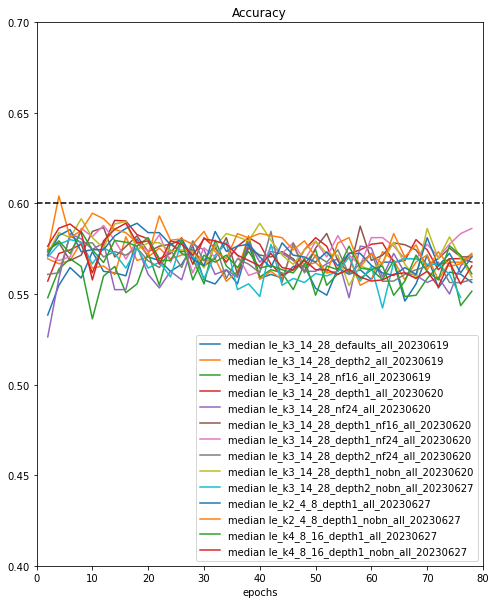

In [57]:
def plot_accuracy_vs_epochs(grp, runs, xlim=(0,80), ylim=(0.0,0.7), figsize=(8,10), plots=['mean','std']):
    # copy data in a new dataframe, separate kernel sets
    ddd = pd.DataFrame()

    for i in range(len(runs)):
        ddd['epochs_'+runs[i]] = pd.Series(grp.loc[runs[i],'all']['epochs'].values)
        for p in plots:
            ddd[p + ' '+runs[i]] = pd.Series(grp.loc[runs[i],'all'][p].values)

    ddd['epochs'] = ddd['epochs_' + runs[0]]
    for k in runs:
        ddd.drop(columns=['epochs_' + k], inplace=True)

    fig = plt.figure()
    fig.add_subplot()
    ax = fig.axes

    ax = ddd.plot('epochs', title='Accuracy', xlim=xlim, ylim=ylim, figsize=figsize, ax=ax[0]).legend(loc='lower right')
    plt.gca().axhline(y=0.6, color='black', linestyle='--')
    plot_dir = Path('/proj/hajaalin/Projects/n_track_ML/output/images')
    plot_dir.mkdir(exist_ok=True)
    ts = datetime.now().strftime('%Y%m%d%H%M')
    plt.savefig(plot_dir / ('accuracy_vs_epochs_%s.png' % ts))

# all the runs
runs = df.run.unique()

plot_accuracy_vs_epochs(grp, runs, plots=['median'], ylim=(0.4,0.7))

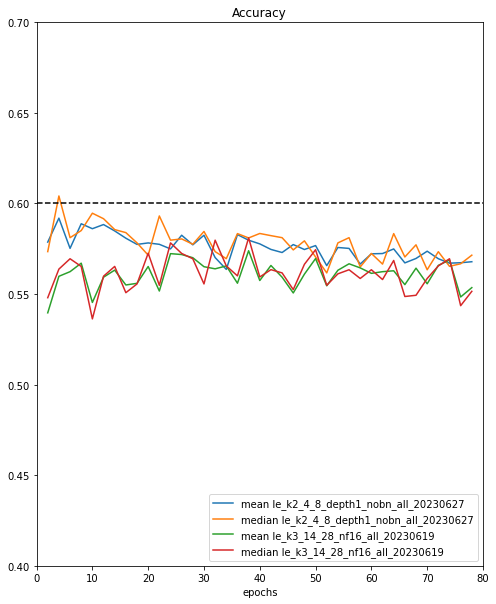

In [62]:
# pick one from top and one from bottom
runs = ['le_k2_4_8_depth1_nobn_all_20230627', 'le_k3_14_28_nf16_all_20230619']
    
# show also median
plot_accuracy_vs_epochs(grp, runs, plots=['mean', 'median'], ylim=(0.4,0.7))

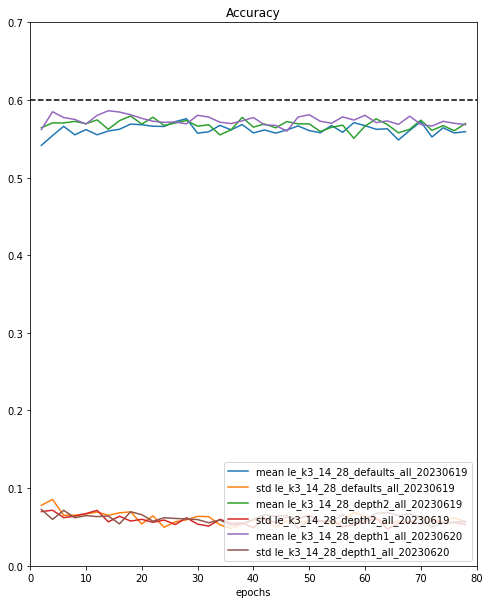

In [63]:
# compare depth of model

runs = ['le_k3_14_28_defaults_all_20230619', 
        'le_k3_14_28_depth2_all_20230619', 
        #'le_k3_14_28_nf16_all_20230619',
        'le_k3_14_28_depth1_all_20230620',
        #'le_k3_14_28_depth1_nf24_all_20230620',
        #'le_k3_14_28_depth2_nf24_all_20230620',
        #'le_k3_14_28_depth1_nf24_all_20230620'
       ]

plot_accuracy_vs_epochs(grp, runs)

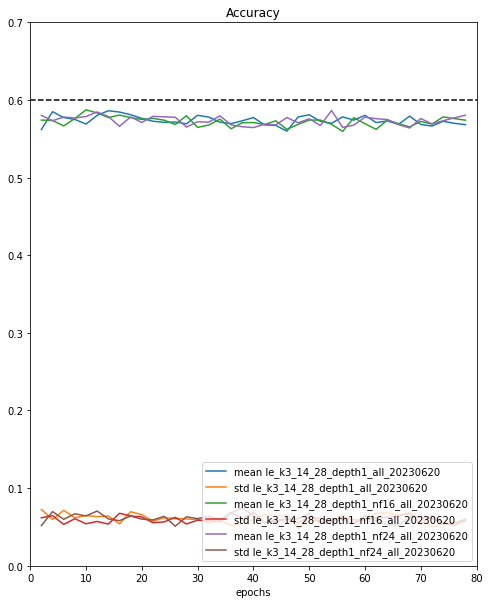

In [64]:
# compare number of filters in inception module

runs = [#'le_k3_14_28_defaults_all_20230619', 
        #'le_k3_14_28_depth2_all_20230619', 
        #'le_k3_14_28_nf16_all_20230619',
        'le_k3_14_28_depth1_all_20230620',
        'le_k3_14_28_depth1_nf16_all_20230620',
        'le_k3_14_28_depth1_nf24_all_20230620',
        #'le_k3_14_28_depth2_nf24_all_20230620',
        #'le_k3_14_28_depth1_nf24_all_20230620'
       ]

plot_accuracy_vs_epochs(grp, runs)

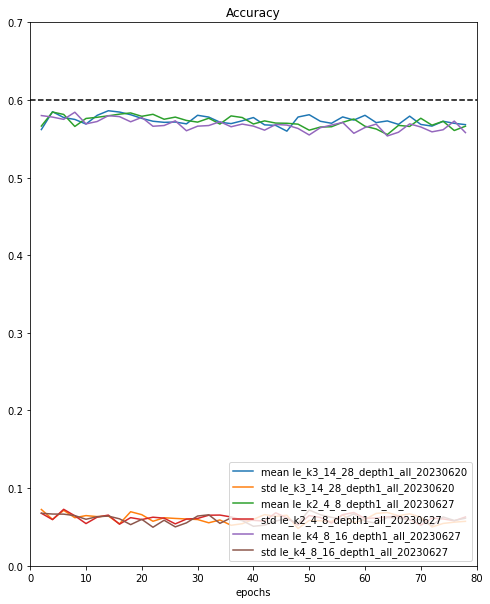

In [65]:
# compare different sets of filter lengths

runs = [#'le_k3_14_28_defaults_all_20230619', 
        #'le_k3_14_28_depth2_all_20230619', 
        #'le_k3_14_28_nf16_all_20230619',
        'le_k3_14_28_depth1_all_20230620',
        #'le_k3_14_28_depth1_nf16_all_20230620',
        #'le_k3_14_28_depth1_nf24_all_20230620',
        #'le_k3_14_28_depth2_nf24_all_20230620',
        #'le_k3_14_28_depth1_nf24_all_20230620',
        'le_k2_4_8_depth1_all_20230627',
        'le_k4_8_16_depth1_all_20230627',
       ]

plot_accuracy_vs_epochs(grp, runs)

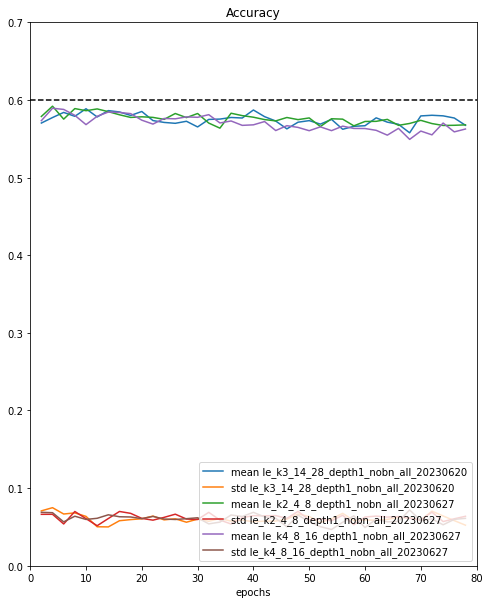

In [66]:
# compare different sets of filter lengths, no bottleneck (even less parameters for depth=1 model)

runs = ['le_k3_14_28_depth1_nobn_all_20230620',
        'le_k2_4_8_depth1_nobn_all_20230627',
        'le_k4_8_16_depth1_nobn_all_20230627',
       ]

plot_accuracy_vs_epochs(grp, runs)

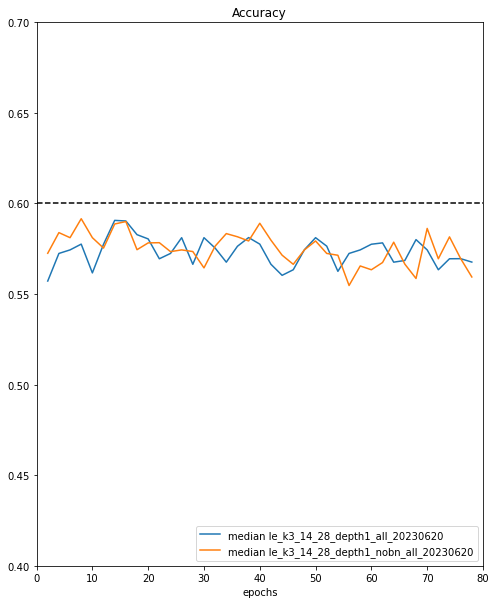

In [73]:
# compare w/ and w/o bottleneck

runs = ['le_k3_14_28_depth1_all_20230620',
        'le_k3_14_28_depth1_nobn_all_20230620',
        #'le_k2_4_8_depth1_all_20230627',
        #'le_k4_8_16_depth1_all_20230627',
        #'le_k2_4_8_depth1_nobn_all_20230627',
        #'le_k4_8_16_depth1_nobn_all_20230627',
       ]

plot_accuracy_vs_epochs(grp, runs, ylim=(0.4,0.7), plots=['median'])